# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
import pandas as pd

In [2]:
# import files

movies_df = pd.read_csv('movies.csv')

rating_df = pd.read_csv('ratings.csv' )

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
rating_df.shape

(100836, 4)

In [6]:
rating_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## How many movies has this user watched?

In [7]:
watched_count = rating_df['userId'].value_counts()[2]

print("User 2 has seen %i movies "%watched_count)

User 2 has seen 29 movies 


## Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.

In [8]:
rating_counts = rating_df['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

print(rating_counts)


   rating  count
0     4.0  26818
1     3.0  20047
2     5.0  13211
3     3.5  13136
4     4.5   8551
5     2.0   7551
6     2.5   5550
7     1.0   2811
8     1.5   1791
9     0.5   1370


In [9]:
unique_ratings = rating_df['rating'].value_counts()
unique_ratings

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [10]:
sorted_ratings = unique_ratings.sort_index()

print(sorted_ratings)

0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64


In [11]:
user_2_ratings = rating_df[rating_df['userId'] == 2]['rating'].value_counts()
user_2_ratings

4.0    9
5.0    6
3.0    4
4.5    4
3.5    4
2.5    1
2.0    1
Name: rating, dtype: int64

In [12]:
rating_df['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [13]:
rating_df['rating'].value_counts()[2.5]

5550

In [14]:
import seaborn as sns

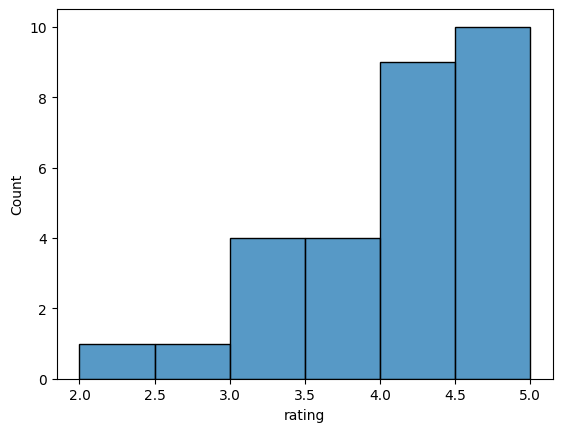

In [15]:

_ = sns.histplot(rating_df[rating_df['userId'] == 2]['rating'] ) 


## What are some of user 2's top movies?

In [16]:
top_movies_user2 = rating_df[(rating_df['rating'] == 5.0) & (rating_df['userId'] == 2)]
top_movies_user2['movieId']

241     60756
248     80906
250     89774
254    106782
259    122882
260    131724
Name: movieId, dtype: int64

In [17]:
print("*****User 2's top favorite Movies****")
for movie_id in top_movies_user2['movieId']:
    movie_title = movies_df.loc[movies_df['movieId'] == movie_id, [ 'title', 'genres']].values[0]
    print(movie_title)


*****User 2's top favorite Movies****
['Step Brothers (2008)' 'Comedy']
['Inside Job (2010)' 'Documentary']
['Warrior (2011)' 'Drama']
['Wolf of Wall Street, The (2013)' 'Comedy|Crime|Drama']
['Mad Max: Fury Road (2015)' 'Action|Adventure|Sci-Fi|Thriller']
['The Jinx: The Life and Deaths of Robert Durst (2015)' 'Documentary']


## Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.

In [18]:
# Filter ratings for user 2
user_2_ratings = rating_df[rating_df['userId'] == 2]

# Group ratings by userId and compute mean ratings for each user
user_ratings_mean = rating_df.groupby('userId')['rating'].mean()
user_ratings_mean

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

In [19]:
from sklearn.metrics.pairwise import cosine_distances, euclidean_distances, cosine_similarity

In [20]:
user_2_ratings = rating_df[rating_df['userId'] == 2]

In [21]:
user_item_matrix = pd.pivot_table(rating_df, index='userId', columns='movieId', values='rating', fill_value=0)
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0,0.0,4.0,...,0.0,0,0,0,0.0,0,0.0,0.0,0.0,0


In [22]:
cosine_similarities = cosine_similarity(user_item_matrix)
cosine_similarities

array([[1.        , 0.02728287, 0.05972026, ..., 0.29109737, 0.09357193,
        0.14532081],
       [0.02728287, 1.        , 0.        , ..., 0.04621095, 0.0275654 ,
        0.10242675],
       [0.05972026, 0.        , 1.        , ..., 0.02112846, 0.        ,
        0.03211875],
       ...,
       [0.29109737, 0.04621095, 0.02112846, ..., 1.        , 0.12199271,
        0.32205486],
       [0.09357193, 0.0275654 , 0.        , ..., 0.12199271, 1.        ,
        0.05322546],
       [0.14532081, 0.10242675, 0.03211875, ..., 0.32205486, 0.05322546,
        1.        ]])

In [23]:
cosine_similarities_df = pd.DataFrame(cosine_similarities, index=user_item_matrix.index, columns=user_item_matrix.index)
cosine_similarities_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.164191,0.028429,0.012993,0.200395,0.106435,0.102123,0.200035,0.099388,0.075898,0.088963,...,0.178084,0.116534,0.300669,0.066032,0.148141,1.000000,0.153063,0.262558,0.069622,0.201104
607,0.269389,0.012948,0.019247,0.131746,0.152866,0.162182,0.186114,0.185142,0.011844,0.010451,...,0.092525,0.199910,0.203540,0.137834,0.118780,0.153063,1.000000,0.283081,0.149190,0.139114
608,0.291097,0.046211,0.021128,0.149858,0.135535,0.178809,0.323541,0.187233,0.100435,0.077424,...,0.158355,0.197514,0.232771,0.155306,0.178142,0.262558,0.283081,1.000000,0.121993,0.322055


In [24]:
similar_users = cosine_similarities_df[2].sort_values(ascending=False)
similar_users

userId
2      1.000000
366    0.300074
417    0.280425
378    0.276010
550    0.254157
         ...   
383    0.000000
492    0.000000
245    0.000000
377    0.000000
321    0.000000
Name: 2, Length: 610, dtype: float64

In [25]:
print("Most similar user to user 2 using cosine similarity is UserID", similar_users.index[1])

Most similar user to user 2 using cosine similarity is UserID 366


In [38]:
# second form using Euclidean distance
euclidean_distances = euclidean_distances(user_item_matrix)
#euclidean_distances

TypeError: 'numpy.ndarray' object is not callable

In [27]:
max_distance = euclidean_distances.max()  # Maximum possible Euclidean distance
euclidean_similarities = 1 - (euclidean_distances / max_distance)
euclidean_similarities

array([[1.        , 0.63538467, 0.64107888, ..., 0.48390804, 0.64436019,
        0.25780745],
       [0.63538467, 1.        , 0.84751165, ..., 0.4978892 , 0.84914589,
        0.29526808],
       [0.64107888, 0.84751165, 1.        , ..., 0.49686958, 0.85353966,
        0.28847084],
       ...,
       [0.48390804, 0.4978892 , 0.49686958, ..., 1.        , 0.50714714,
        0.27915902],
       [0.64436019, 0.84914589, 0.85353966, ..., 0.50714714, 1.        ,
        0.29057352],
       [0.25780745, 0.29526808, 0.28847084, ..., 0.27915902, 0.29057352,
        1.        ]])

In [28]:
euclidean_similarities_df = pd.DataFrame(euclidean_similarities, index=user_item_matrix.index, columns=user_item_matrix.index)
euclidean_similarities_df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.635385,0.641079,0.592103,0.642894,0.550922,0.616098,0.643420,0.636645,0.593255,...,0.596263,0.621688,0.386782,0.616202,0.599922,0.319015,0.616831,0.483908,0.644360,0.257807
2,0.635385,1.000000,0.847512,0.690997,0.830177,0.654323,0.753271,0.829547,0.833685,0.765808,...,0.764126,0.761528,0.403703,0.784302,0.721451,0.348995,0.702890,0.497889,0.849146,0.295268
3,0.641079,0.847512,1.000000,0.693993,0.834959,0.654818,0.754428,0.833343,0.839653,0.763092,...,0.747064,0.764396,0.406558,0.788870,0.725998,0.348661,0.706691,0.496870,0.853540,0.288471
4,0.592103,0.690997,0.693993,1.000000,0.699582,0.581596,0.656510,0.690791,0.687945,0.646780,...,0.646135,0.664602,0.431287,0.666204,0.631656,0.348866,0.627721,0.466120,0.696697,0.265483
5,0.642894,0.830177,0.834959,0.699582,1.000000,0.683977,0.754783,0.860714,0.821729,0.754019,...,0.742679,0.803019,0.413016,0.804247,0.731855,0.356338,0.713181,0.506007,0.856824,0.288725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.319015,0.348995,0.348661,0.348866,0.356338,0.306692,0.361626,0.355215,0.353181,0.339439,...,0.355204,0.345398,0.270347,0.341541,0.343013,1.000000,0.338759,0.298159,0.354405,0.144261
607,0.616831,0.702890,0.706691,0.627721,0.713181,0.605461,0.678763,0.716658,0.698781,0.652554,...,0.656198,0.686830,0.404226,0.689580,0.646846,0.338759,1.000000,0.506359,0.719462,0.277252
608,0.483908,0.497889,0.496870,0.466120,0.506007,0.456790,0.527792,0.512587,0.502493,0.476753,...,0.488183,0.501767,0.326180,0.499727,0.485501,0.298159,0.506359,1.000000,0.507147,0.279159


In [29]:
similar_users_euc = euclidean_similarities_df[2].sort_values(ascending=False)
similar_users_euc


userId
2      1.000000
442    0.882868
461    0.872885
508    0.872516
189    0.871600
         ...   
380    0.311593
610    0.295268
599    0.289677
474    0.163637
414    0.057451
Name: 2, Length: 610, dtype: float64

In [30]:
most_similar_user_euclidean = similar_users_euc.index[1]
most_similar_user_euclidean

442

In [31]:
print("Most similar user to user 2 using Euclidean is UserID:", most_similar_user_euclidean)

Most similar user to user 2 using Euclidean is UserID: 442


## Recommend a few movies for user 2 using similarity metrics.

In [33]:
top_movies_user2 = top_movies_user2['movieId']

In [34]:
similar_users = cosine_similarities_df.loc[2].sort_values(ascending=False)[1:]
similar_users[:4] # top 4 users 

userId
366    0.300074
417    0.280425
378    0.276010
550    0.254157
Name: 2, dtype: float64

In [35]:
#similar_users_above_threshold = similar_users[similar_users > 0.2]
#similar_users_above_threshold 

In [36]:
# top movies for top for users
movie_ids_list = []

for user_id in similar_users[:4].index:
    top_movies = rating_df[(rating_df['rating'] == 5.0) & (rating_df['userId'] == user_id)]
    movie_ids = top_movies['movieId'].tolist() 
    if not any(movie_id in top_movies_user2 for movie_id in movie_ids):
        movie_ids_list.append(movie_ids)

# picking 2 
movie_ids_list[2]


[48780, 79132]

In [37]:
print("*****User 2's Movie recomedation****")
for movie_id in movie_ids_list[2]:
    movie_title = movies_df.loc[movies_df['movieId'] == movie_id,[ 'title', 'genres']].values[0]
    print(movie_title)

*****User 2's Movie recomedation****
['Prestige, The (2006)' 'Drama|Mystery|Sci-Fi|Thriller']
['Inception (2010)' 'Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX']


## Do the recommendations from this method make sense?

Although I don't know if they are the correct recommendations, I would think, from the looks of it, that the recommendations from this system make sense, as the genres present in user 2's top picks are also present in these two movies.

# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

NOTE:
For this assignment, I started by importing both of my data and checking to see whether they have any missing values. Once I had that out of the way, I started by seeing how many movies user 2 has watched. This can simply be done by using the value counts function specific to user id 2. Next, I plotted a chart of their movie ratings specific to user 2 by using the value count function as well as a condition statement to make sure we only see user 2's ratings. The histogram was simply done by using seaborn, where the plotting is based on the number order of the x-axis in ascending order. Next, to find the top movies of user 2, we looked at using a condition statement where we look at ratings of 5.0 only specific to user 2. We can use the previous step to see how many 5.0 ratings user 2 has, and we got 6. With our new output of top movies, we also have a count of 6 top movies. To get the names of user 2's movie names, I used a for loop for the movie ids to use in the conditional of my for loop, where it uses the movie id to look through the dataframe of the movies library. This way, we got all 6 movie names including their genres.

To find similar users who like similar movies as user 2, we used cosine similarity and Euclidean distances. For cosine similarity, I started by making a pivot table where we look at the rating dataframe and have the index of userId and columns of movie id. The pivot table shows user ratings for movie id based on user ids. Next, I used the cosine similarity function with the pivot table to find similarity values. In a dataframe format, we can see that user 366 has a higher correlation to user 2, so we pick user 366.

Using Euclidean distance, I had some issues where I followed similar steps to using cosine similarity, but I wasn’t able to print out the output of the function due to an error. Therefore, for this sample code, I used the following to resolve my issue:
max_distance = euclidean_distances.max()  # Maximum possible Euclidean distance
euclidean_similarities = 1 - (euclidean_distances / max_distance)
euclidean_similarities

I am not 100% sure what the code does as i retireved it form chatgpt to fix my issue; however, it was able to provide me with my values to compare users. For this similarity test, I found that user 442 is similar to user 2.

Lastly, to recommend movies for user 2, I followed similar code from previous steps to recommend 2 movies. I first looked at cosine similarities matrix and used my top 4 users' information to pick movies for user 2. From my top 4 users, I made a for loop where I looked at the user id of my top 4 users and put their movies they rated as 5.0 into a list. When creating the list, I made sure in the for loop not to add movies user 2 has seen. With the provided list, I had another for loop as above to retrieve movie titles and genres based on the movie id I have in my list. This way, I was able to retrieve my top 2 movie recommendations.